In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r"C:\Users\hp\Desktop\DSA Dataset\iris.xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Handling Missing Values

In [5]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

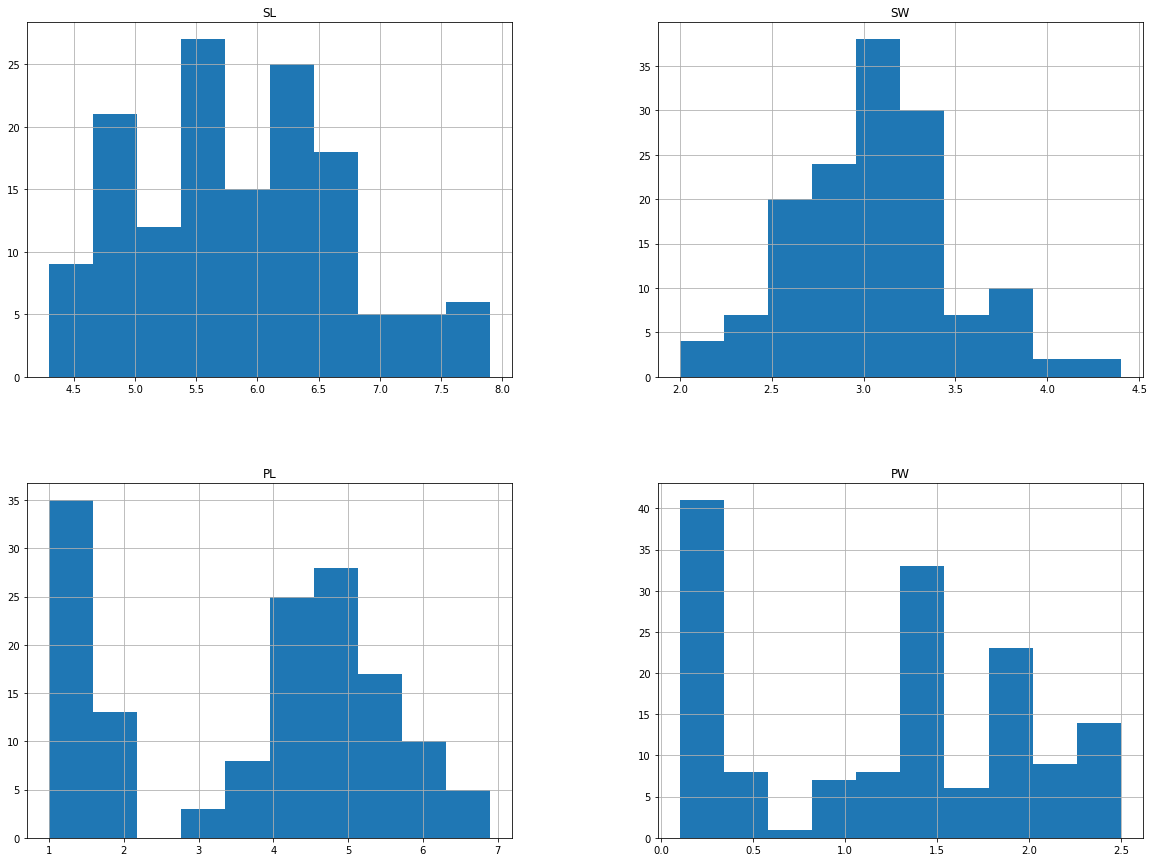

In [6]:
fraqgraph=data.select_dtypes(include=["float"])
fraqgraph.hist(figsize=(20,15))
plt.show

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
data["SL"]=data["SL"].fillna(data["SL"].median())

In [10]:
data["SW"]=data["SW"].fillna(data["SW"].median())

In [11]:
data["PL"]=data["PL"].fillna(data["PL"].median())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Handling Outliers

Text(0.5, 1.0, 'Box Plot of SL')

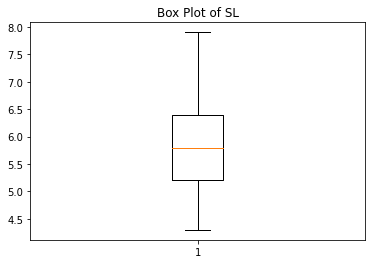

In [13]:
plt.boxplot(data["SL"])
plt.title("Box Plot of SL")

No outliers

Text(0.5, 1.0, 'Box Plot of SW')

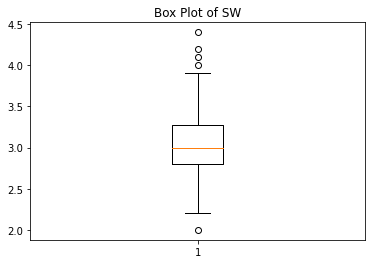

In [14]:
plt.boxplot(data["SW"])
plt.title("Box Plot of SW")

In [15]:
Q1=np.percentile(data["SW"],25,interpolation="midpoint")
Q2=np.percentile(data["SW"],50,interpolation="midpoint")
Q3=np.percentile(data["SW"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)
data["SW"].median()

2.8
3.0
3.25


3.0

In [16]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)
outlier=[]
for x in data["SW"]:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

2.1249999999999996
3.9250000000000003


In [17]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [18]:
ind1=data["SW"][(data["SW"]>up_lim)|(data["SW"]<low_lim)].index
ind1

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [19]:
data.drop(ind1,inplace=True)

Text(0.5, 1.0, 'Box Plot of sw')

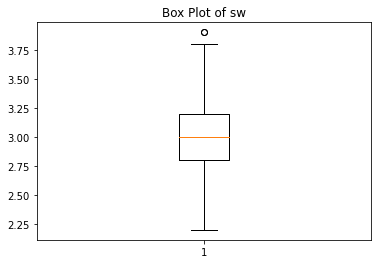

In [20]:
plt.boxplot(data["SW"])
plt.title("Box Plot of sw")

Text(0.5, 1.0, 'Box Plot of PL')

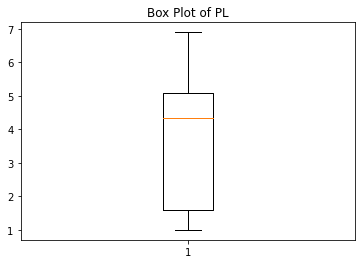

In [21]:
plt.boxplot(data["PL"])
plt.title("Box Plot of PL")

no outliers

Text(0.5, 1.0, 'Box Plot of PW')

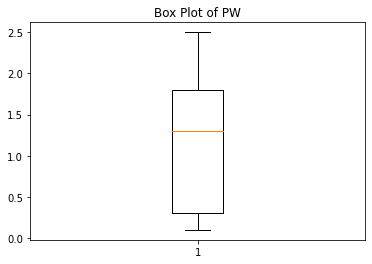

In [22]:
plt.boxplot(data["PW"])
plt.title("Box Plot of PW")

no outliers

# Label Encoding

In [23]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [24]:
x=data.drop(['Classification'],axis=1)
y=data["Classification"]

In [25]:
from sklearn.preprocessing import LabelEncoder
Label_en=LabelEncoder()
data["Classification"]=Label_en.fit_transform(data["Classification"])

In [26]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


# Scaling

In [28]:
x.describe

<bound method NDFrame.describe of       SL   SW    PL   PW
0    5.1  3.5  1.40  0.2
1    4.9  3.0  1.40  0.2
2    5.8  3.2  1.30  0.2
3    4.6  3.1  1.50  0.2
4    5.0  3.6  1.40  0.2
..   ...  ...   ...  ...
145  6.7  3.0  5.20  2.3
146  6.3  2.5  5.00  1.9
147  6.5  3.0  4.35  2.0
148  6.2  3.4  5.40  2.3
149  5.9  3.0  5.10  1.8

[145 rows x 4 columns]>

In [29]:
type(x)

pandas.core.frame.DataFrame

In [30]:
from sklearn.preprocessing import StandardScaler
standardisation=StandardScaler()
x=standardisation.fit_transform(x)
x=pd.DataFrame(x)
x.describe

<bound method NDFrame.describe of             0         1         2         3
0   -0.942975  1.277411 -1.434398 -1.359047
1   -1.188673 -0.062854 -1.434398 -1.359047
2   -0.083029  0.473252 -1.493003 -1.359047
3   -1.557221  0.205199 -1.375794 -1.359047
4   -1.065824  1.545463 -1.434398 -1.359047
..        ...       ...       ...       ...
140  1.022615 -0.062854  0.792577  1.420200
141  0.531217 -1.403118  0.675368  0.890820
142  0.776916 -0.062854  0.294438  1.023165
143  0.408368  1.009358  0.909786  1.420200
144  0.039820 -0.062854  0.733972  0.758474

[145 rows x 4 columns]>

# Spliting the Data

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)


In [32]:
x_train.shape

(116, 4)

In [33]:
y_train.shape

(116,)

In [34]:
x_test.shape

(29, 4)

In [35]:
y_test.shape

(29,)

# Model Building

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is:",accuracy_score(y_test,y_pred))


Accuracy is: 0.9310344827586207


# KNN Model

In [37]:
from sklearn.neighbors import KNeighborsClassifier

TO FIND THE OPTIMUM VALUE OF K

In [38]:
acc_values=[]
neighbors=np.arange(3,12)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="wminkowski")
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    

TypeError: __init__() takes exactly 2 positional arguments (1 given)

# Decision Tree Model

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))


Accuracy is: 0.896551724137931


# SVM Model

In [43]:
from sklearn.svm import SVC
svm_linear=SVC(kernel="rbf")
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.9310344827586207


# Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.896551724137931


In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion="entropy")
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.9310344827586207
